<a href="https://colab.research.google.com/github/kopmean/Teach-Basic-Ai/blob/main/01.Image_classification_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [95]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import seaborn as sns

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# Visualization

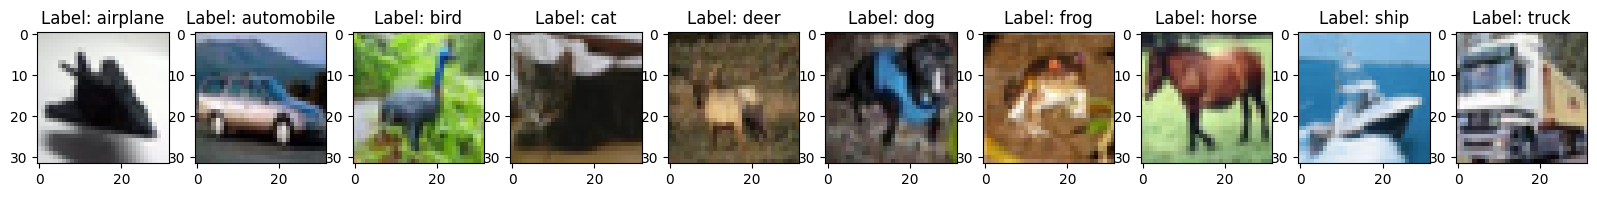

In [72]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(0, num_classes):
  sample = x_train[y_train.flatten() == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Label: {classes[i]}", fontsize=12)

# Dataset Pre-Processing

In [4]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [6]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

In [126]:
print(x_train2.shape)
print(x_test2.shape)

(50000, 3072)
(10000, 3072)


# Implementing a Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model=RandomForestClassifier()

In [9]:
model.fit(x_train2,y_train)

<ipython-input-9-97b78d839c03>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train2,y_train)


RandomForestClassifier()

In [10]:
y_pred=model.predict(x_test2)
y_pred

array([6, 8, 8, ..., 3, 5, 7], dtype=uint8)

In [11]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.54      0.56      1061
           1       0.54      0.53      0.54      1022
           2       0.30      0.37      0.33       835
           3       0.28      0.34      0.31       846
           4       0.39      0.39      0.39      1002
           5       0.39      0.41      0.40       936
           6       0.57      0.48      0.52      1199
           7       0.46      0.52      0.49       895
           8       0.61      0.58      0.59      1049
           9       0.56      0.48      0.52      1155

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



Text(0.5, 1.0, 'Confusion Matrix RandomForest')

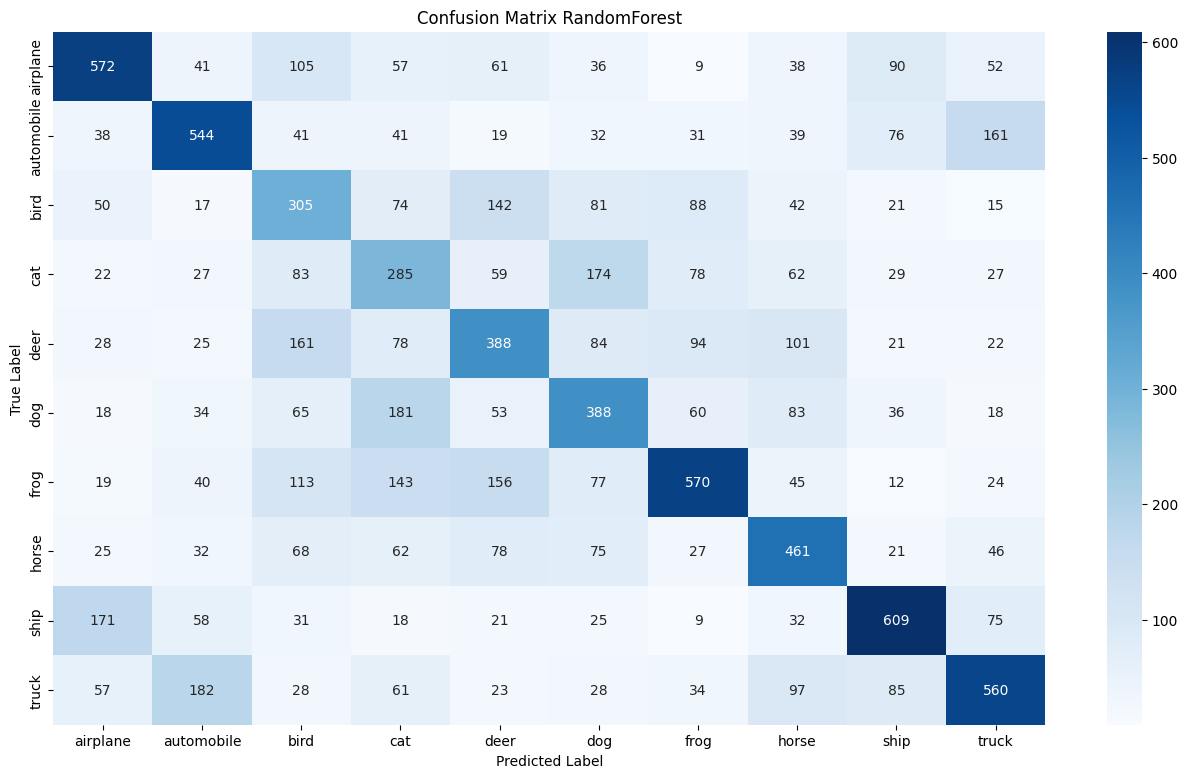

In [105]:
confusion_mtx = confusion_matrix(y_pred,y_test)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix RandomForest')

# Implementing a KNN


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=7)

In [15]:
knn.fit(x_train2,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [16]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [17]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



Text(0.5, 1.0, 'Confusion Matrix KNeighbors')

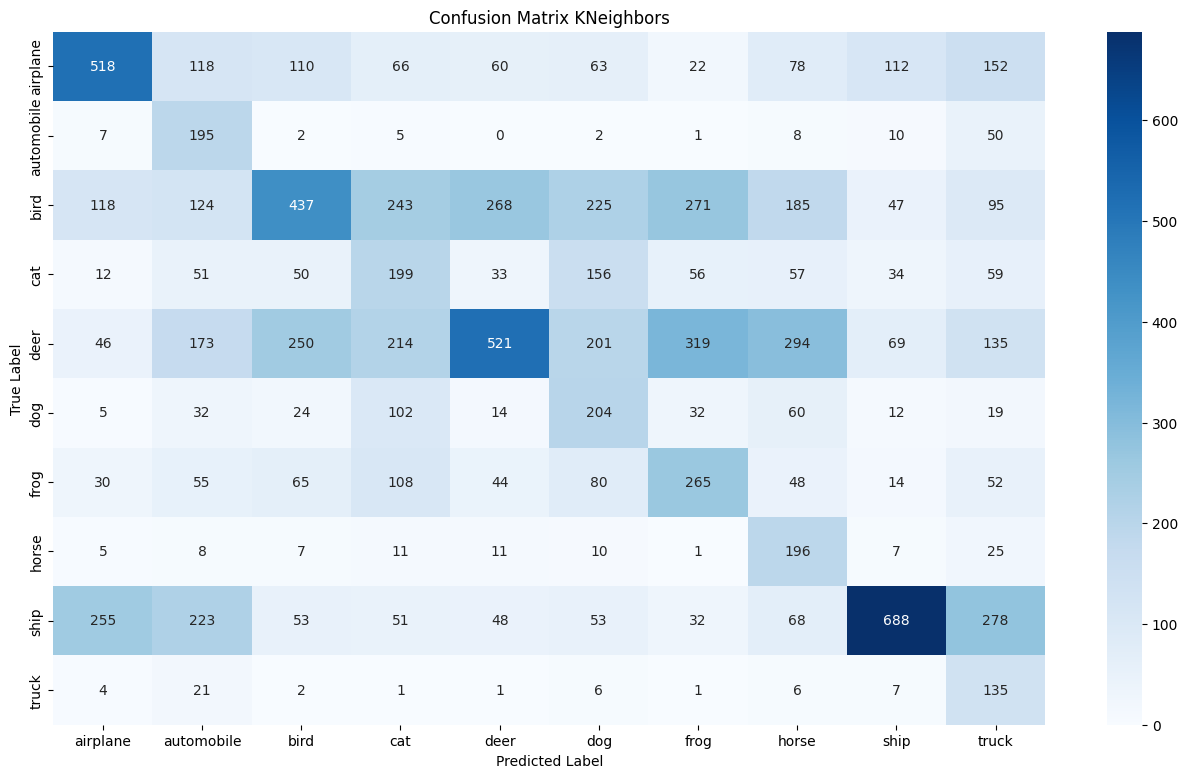

In [104]:
confusion_mtx = confusion_matrix(y_pred_knn,y_test)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix KNeighbors')

# Implementing a Decision Tree


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc=DecisionTreeClassifier()

In [21]:
dtc.fit(x_train2,y_train)

DecisionTreeClassifier()

In [22]:
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc

array([7, 3, 9, ..., 2, 3, 1], dtype=uint8)

In [23]:
accuracy_score(y_pred_dtc,y_test)
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.35      0.34      0.34      1046
           1       0.26      0.28      0.27       939
           2       0.22      0.20      0.21      1114
           3       0.19      0.19      0.19      1001
           4       0.22      0.21      0.21      1026
           5       0.22      0.22      0.22       977
           6       0.27      0.28      0.28       976
           7       0.26      0.28      0.27       933
           8       0.38      0.37      0.38      1020
           9       0.29      0.30      0.30       968

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

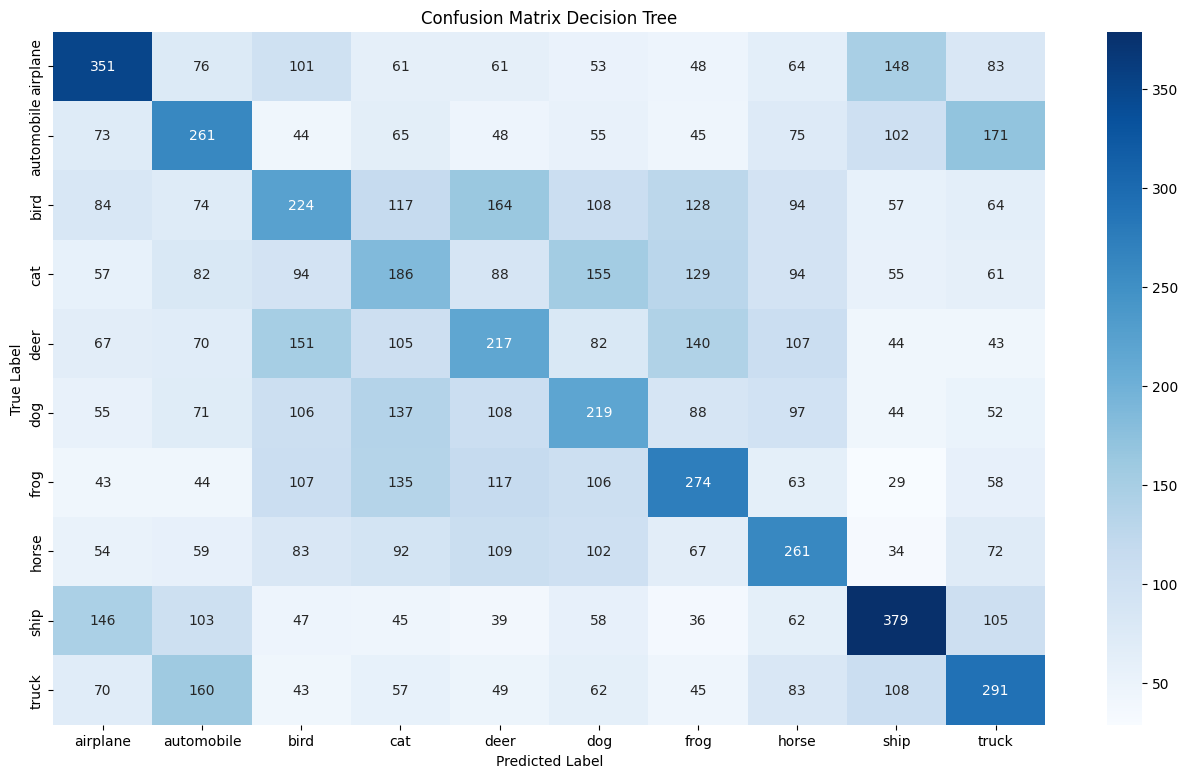

In [103]:
confusion_mtx = confusion_matrix(y_pred_dtc,y_test)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix Decision Tree')

# Implementing a Naive Bayes classifier


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb=GaussianNB()

In [27]:
nb.fit(x_train2,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [28]:
y_pred_nb=nb.predict(x_test2)
y_pred_nb

array([6, 8, 8, ..., 6, 5, 4], dtype=uint8)

In [29]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.27      0.35      1817
           1       0.17      0.41      0.24       405
           2       0.08      0.19      0.12       443
           3       0.08      0.25      0.12       305
           4       0.42      0.24      0.30      1737
           5       0.26      0.31      0.29       840
           6       0.47      0.25      0.33      1846
           7       0.13      0.42      0.20       310
           8       0.47      0.39      0.42      1219
           9       0.41      0.38      0.39      1078

    accuracy                           0.30     10000
   macro avg       0.30      0.31      0.28     10000
weighted avg       0.39      0.30      0.32     10000



Text(0.5, 1.0, 'Confusion Matrix GaussianNB')

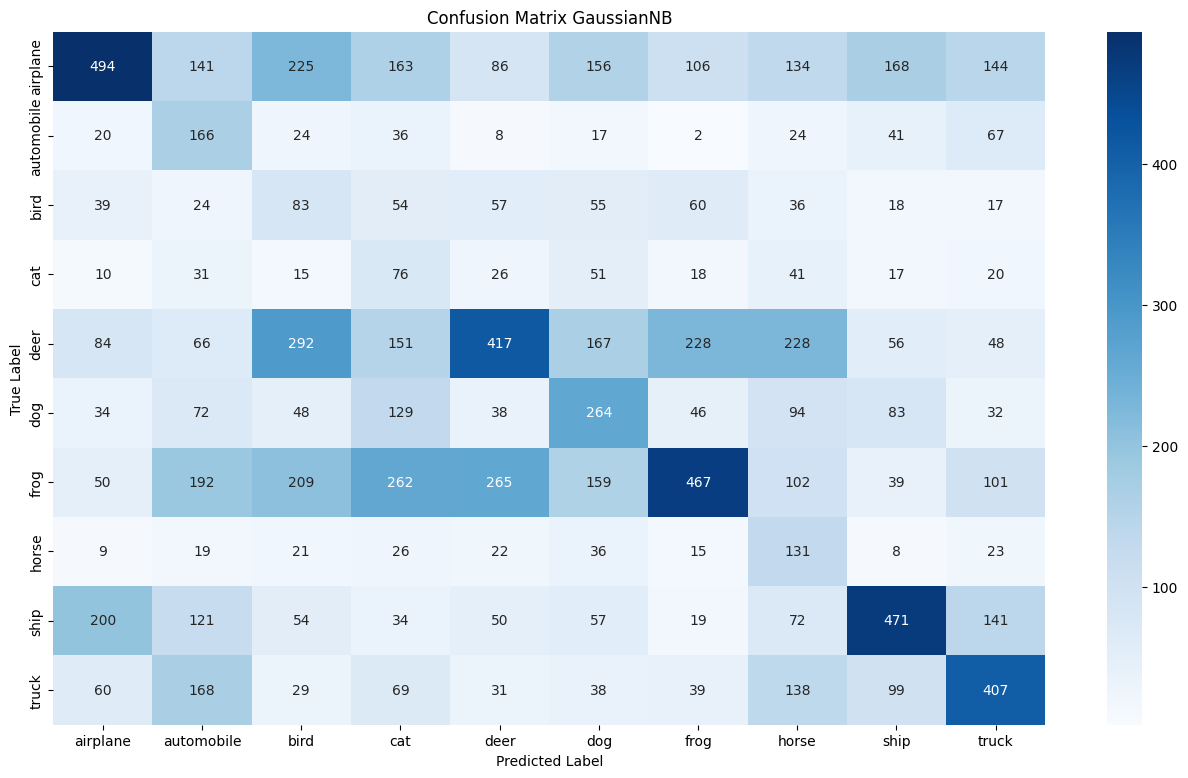

In [102]:
confusion_mtx = confusion_matrix(y_pred_nb,y_test)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues", xticklabels=classes, yticklabels=classes)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix GaussianNB')

# Results

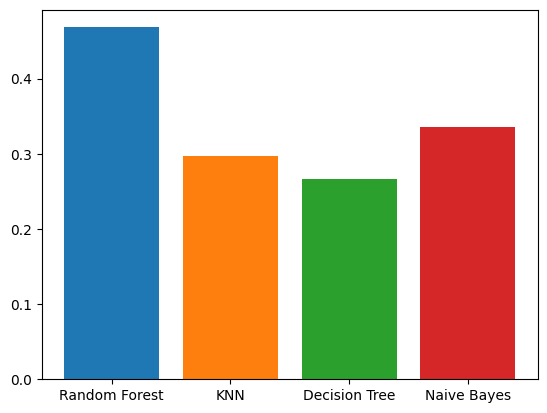

In [94]:
accuracy_score(y_pred,y_test)
plt.bar('Random Forest',accuracy_score(y_pred,y_test))
plt.bar('KNN',accuracy_score(y_pred_nb,y_test))
plt.bar('Decision Tree',accuracy_score(y_pred_dtc,y_test))
plt.bar('Naive Bayes',accuracy_score(y_pred_knn,y_test))
plt.show()

# Testing for custom input


In [117]:
!wget https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200

--2023-07-10 04:47:49--  https://cdn.download.ams.birds.cornell.edu/api/v1/asset/202984001/1200
Resolving cdn.download.ams.birds.cornell.edu (cdn.download.ams.birds.cornell.edu)... 18.154.110.29, 18.154.110.66, 18.154.110.82, ...
Connecting to cdn.download.ams.birds.cornell.edu (cdn.download.ams.birds.cornell.edu)|18.154.110.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109978 (107K) [image/jpeg]
Saving to: ‘1200.2’

1200.2              100%[===================>] 107.40K  --.-KB/s    in 0.02s   

2023-07-10 04:47:49 (4.64 MB/s) - ‘1200.2’ saved [109978/109978]



In [118]:
img_arr=cv2.imread('/content/1200')
img_arr=cv2.resize(img_arr,(32,32))

In [119]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [120]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [121]:
ans=model.predict(img_arr2)
print(classes[ans[0]])
#RandomForestClassifier

bird


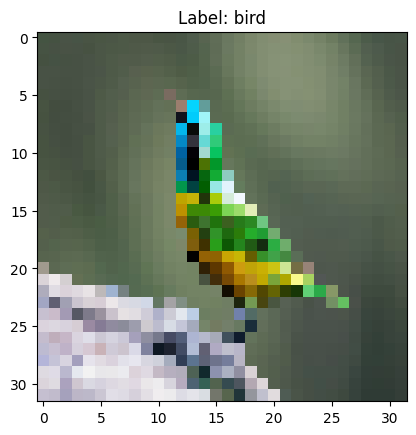

In [122]:
plt.imshow(img_arr)
plt.title(f"Label: {classes[ans[0]]}", fontsize=12)
plt.show()